[View in Colaboratory](https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre2/CTR1_Exercice2_4.ipynb)

# Exercice 2.4

On desire résoudre les deux équations différentielles ci-dessous pour t = 5000 s avec Python:

$r=A\cdot ux - B\cdot yz$<br>
$\frac{du}{dt}=-r-\frac{D}{v}\cdot u$<br>
$\frac{dv}{dt}=D$<br>
$\frac{dx}{dt}=-r+\frac{D}{v}\cdot (10.93-x)$<br>
$\frac{dy}{dt}=r-\frac{D}{v}\cdot y$<br>
$\frac{dz}{dt}=r-\frac{D}{v}\cdot z$<br>

Avec<br>

- A = 9.0·10<sup>-5</sup>
- B = 8.33·10<sup>-5</sup>
- D = 0.05 pour t $\leq$ 4000 ou 0 sinon

Les conditions initiales sont:

- u<sub>0</sub> = 7.72
- v<sub>0</sub> = 200
- x<sub>0</sub> = 0
- y<sub>0</sub> = 0
- z<sub>0</sub> = 0

## Importer les outils

On commence par importer les bibliothèques nécessaire pour résoudre le problème avec python. Il vient:

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


## Définir les constantes du problème

On commence à aborder le problème en définissant les constantes sur lesquelles se basent le problème.

In [0]:
A = 9e-5
B = 8.33e-5
D = 0.05
u0 = 7.72
v0 = 200
x0 = 0
y0 = 0
z0 = 0
t_dosage = 4000

## Définir les équations à résoudre

Les équations à résoudre sont définies dans une fonction prenant en paramètres les variables dépendantes (premier paramètre), la variable indépendante, et les différentes constantes utilisées par les équations.

In [0]:
def equations(variables, t, A, B, D, t_dosage):
    """Fonction représentant les équations à résoudre."""
    u, v, x, y, z = variables
    r = A * u * x - B * y * z
    
    # SI t est supérieur au temps de dosage
    if t > t_dosage:
        D = 0
    
    dudt = -r - D/v * u
    dvdt = D
    dxdt = -r + D/v * (10.93 - x)
    dydt =  r - D/v * y
    dzdt = r - D/v * z
    return dudt, dvdt, dxdt, dydt, dzdt

## Définir les conditions initiales

Afin de résoudre ce type d'équations différentielles ordinaires, nous devons définir les conditions initiales du problème.

In [0]:
conditions_initiales = [u0, v0, x0, y0, z0]

## Résoudre le problème à l'aide du solveur



In [0]:
t = np.linspace(0, 5000, 10001) # définir les bornes d'intégration

# résolution du problème avec le solveur
resultats = solveur.odeint(
    equations, # 1er paramètre: la fonction contenant les équations à résoudre
    conditions_initiales, # 2e param: les conditions initiales
    t, # 3e param: les bornes d'intégration
    (A, B, D, t_dosage) # 4e param (optionnel): les constantes utilisées par les équations
)

On va récupérer les vecteurs associés à chaque variable de manière à pouvoir éventuellement les afficher séparemment.

In [0]:
u = resultats[:,0]
v = resultats[:,1]
x = resultats[:,2]
y = resultats[:,3]
z = resultats[:,4]

## Visualiser les résultats

Les valeurs de v n'évoluent pas sur la même échelle que celles de u, x, y et z. On décide de les visualiser sur des graphiques différents.


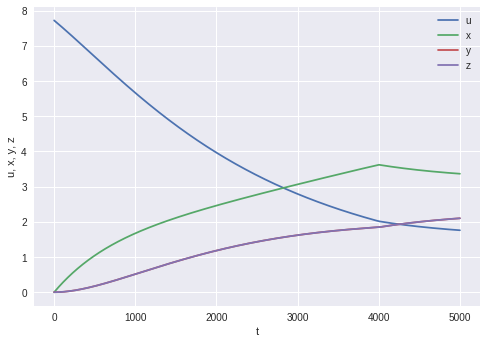

In [7]:
plt.figure(1)
plt.plot(t, u, t, x, t, y, t, z)
plt.xlabel('t')
plt.ylabel('u, x, y, z')
plt.legend(['u','x','y','z'])
plt.show()

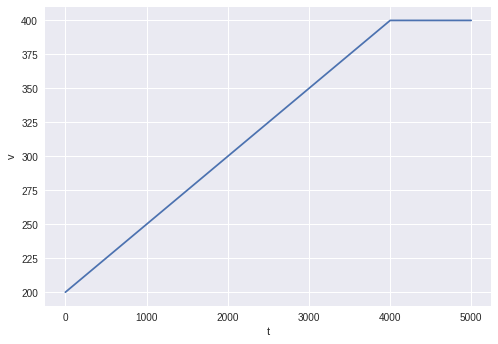

In [8]:
plt.figure(2)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('v')
plt.show()